## Chi-Square Test

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [32]:
import seaborn as sns
df_raw=sns.load_dataset('tips')
df_raw.columns=["Total_Bill","Tip","Sex","Smoker","Day","Time","Size"]
df_raw.head()

,Total_Bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Smoker  Yes  No
Sex            
Male     60  97
Female   33  54


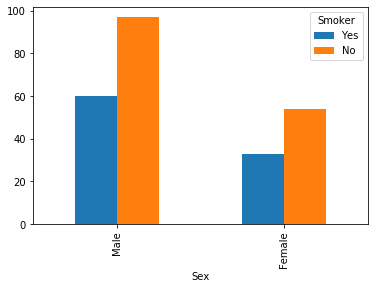

In [33]:
import pandas as pd
Observed_Values=pd.crosstab(df_raw['Sex'],df_raw['Smoker'])
print(pd.crosstab(df_raw['Sex'],df_raw['Smoker']))
pd.crosstab(df_raw['Sex'],df_raw['Smoker']).plot.bar();

* We can observe the collected observations in a table with one variable corresponding to columns and another variable corresponding to rows, a table summarization of two categorical variables in this form is called a contingency table.

In [34]:
from scipy.stats import chi2_contingency
Expected_Values=chi2_contingency(Observed_Values)[3]
Expected_Values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [35]:
Observed_Values.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [36]:
Number_of_rows=len(Observed_Values.iloc[0:2,0])
Number_of_columns=len(Observed_Values.iloc[0,0:2])
DOF=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",DOF)
alpha = 0.05

Degree of Freedom:- 1


In [37]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values.values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [38]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=DOF)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',DOF)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [39]:
if chi_square_statistic>=p_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## T Test
- A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

 T-test has 2 types : 
* One sampled T-test 
* Two-sampled T-test.

#### One-sampled T-test.

In [44]:
df_raw['Total_Bill'].values.tolist()[:10]

[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78]

In [45]:
#Lets take the mean of the Total Bill
df_raw['Total_Bill'].mean()

19.785942622950824

In [48]:
## Lets take sample
import numpy as np
sample_size=10
Bill_Sample=np.random.choice(df_raw['Total_Bill'].values.tolist(),sample_size)
Bill_Sample

array([17.89, 25.28,  9.94, 10.65, 20.69, 12.46, 12.69, 13.81,  8.77,
       16.99])

In [51]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(Bill_Sample,19.7)
print(p_value)

0.017939491240216685


In [52]:
if p_value < 0.05:  
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

 we are rejecting null hypothesis


#### Two-sampled T-test.

In [56]:
import scipy.stats as stats
import math
np.random.seed(6)
#Consider the age of students in a Class A and in Class B
ClassA_Ages=stats.poisson.rvs(loc=18,mu=30,size=60)
ClassB_Ages=stats.poisson.rvs(loc=18,mu=33,size=60)

In [57]:
#Mean of Class A ages
ClassA_Ages.mean()

48.016666666666666

In [58]:
#Mean of Class B ages
ClassB_Ages.mean()

51.11666666666667

In [59]:
_,p_value=stats.ttest_ind(a=ClassA_Ages,b=ClassB_Ages,equal_var=False)

if p_value < 0.05:  
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

We are rejecting null hypothesis


## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.


For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not 


In [64]:
df_iris=sns.load_dataset('iris')
df_iris.columns=["Sepal_length","Sepal_width","Petal_length","Petal_width","Species"]

df_iris.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
df_Anova = df_iris[['Petal_width','Species']]
Groups = pd.unique(df_Anova.Species.values)
Groups

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [74]:
#there are 3 different category of plant and their Species and need to check whether all 3 group are similar or not
d_data = {Group:df_Anova['Petal_width'][df_Anova['Species'] == Group] for Group in Groups}

In [75]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [79]:
print(p)

if p_value < 0.05:  
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

4.169445839443116e-85
We are rejecting null hypothesis


## Z Test

In [85]:
from scipy import stats
from statsmodels.stats import weightstats as stests


ztest ,p_value = stests.ztest(df_iris['Sepal_length'], x2=None, value=5.0)
print(float(p_value))


1.0446696695008141e-35


In [86]:
if p_value<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
